In [16]:
import numpy as np
from implementations_leo import *
from proj1_helpers import *
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [49]:
#Load the data both from train and test csv file
y, x, ids = load_csv_data("train.csv", sub_sample=False)
#_, x_submission, ids_submission = load_csv_data("test.csv", sub_sample=False)



In [50]:
#substitute non values with 0
x[x==-999] = 0


[[  1.24711000e+02   2.66600000e+00   3.06400000e+00]
 [ -9.99000000e+02  -9.99000000e+02   3.47300000e+00]
 [ -9.99000000e+02  -9.99000000e+02   3.14800000e+00]
 [ -9.99000000e+02  -9.99000000e+02   3.31000000e+00]
 [ -9.99000000e+02  -9.99000000e+02   3.89100000e+00]
 [  2.84584000e+02  -5.40000000e-01   1.36200000e+00]
 [  1.58359000e+02   1.13000000e-01   2.94100000e+00]]
[[  1.24711000e+02   2.66600000e+00   3.06400000e+00]
 [  5.89317199e+05   5.89317199e+05   5.89317199e+05]
 [  2.54625911e+05   2.54625911e+05   2.54625911e+05]
 [  5.89317199e+05   5.89317199e+05   5.89317199e+05]
 [  5.89317199e+05   5.89317199e+05   5.89317199e+05]
 [  2.84584000e+02  -5.40000000e-01   1.36200000e+00]
 [  1.58359000e+02   1.13000000e-01   2.94100000e+00]]


Correct answers:  58.1013333333 % for lambda = 0.000000
Correct answers:  57.992 % for lambda = 0.000000
Correct answers:  55.0306666667 % for lambda = 0.000000
Correct answers:  55.204 % for lambda = 0.000000
Correct answers:  54.0933333333 % for lambda = 0.000000
Correct answers:  53.244 % for lambda = 0.000000
Correct answers:  53.0933333333 % for lambda = 0.000000
Correct answers:  52.404 % for lambda = 0.000000
Correct answers:  54.7053333333 % for lambda = 0.000000
Correct answers:  61.076 % for lambda = 0.000000
Correct answers:  68.3946666667 % for lambda = 0.000000
Correct answers:  71.14 % for lambda = 0.000000
Correct answers:  72.4666666667 % for lambda = 0.000000
Correct answers:  73.9213333333 % for lambda = 0.000000
Correct answers:  74.22 % for lambda = 0.000000
Correct answers:  74.8986666667 % for lambda = 0.000000
Correct answers:  75.3946666667 % for lambda = 0.000001
Correct answers:  75.5626666667 % for lambda = 0.000001
Correct answers:  75.8013333333 % for lambd

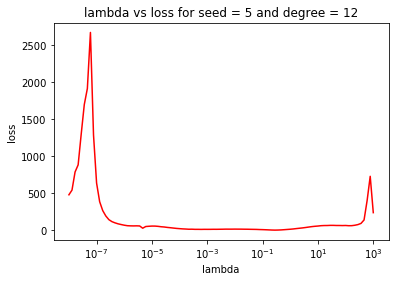

In [21]:
'''Define values to perform Ridge regression with simple splitting of the dataset'''

degree = 12
ratio = 0.7 #train/test examples
lambdas = np.logspace(-8,3,100)
seed = 5

ridge_with_simple_splitting(y,x, degree, ratio, lambdas, seed)

In [13]:
def ridge_with_simple_splitting(y,x, degree, ratio, lambdas, seed = 1):
    loss = []
    y_train, x_train, y_test, x_test = split_data(y, x, ratio, seed)

    phi_test = build_poly(x_test, degree, False)
    phi_train = build_poly(x_train, degree, False)

    for lambda_ in lambdas:

        w = ridge_regression(y_train, phi_train, lambda_)
        rmse_test = cost_function(y_test, phi_test, w)

        loss.append(rmse_test)

        print("Correct answers: ",predict(y_test,phi_test,w), '%', "for lambda = %f" %lambda_)
    semilog_loss_lambda_plot(loss, lambdas, seed, degree)

In [23]:
def cross_validation_ridge(y, x, k_fold, degree, lambdas, seed = 1):
    '''perform cross validation on ridge regression
    lambdas: array, better if log spaced
    print percentage of correct answers for each k, lambda
    plot in semilog scale rmse as function of lambda'''
    
    #create empty
    loss = np.zeros((len(lambdas))) 
    #add poly values to the features
    phi = build_poly(x, degree, False)
    #build indices for cross validation
    k_indices = build_k_indices(y, k_fold, seed)

    for k in range(k_fold):
        #split data according to kth fold
        y_train, phi_train, y_test, phi_test = split_data_cross(y, phi, k, k_indices, degree)

        loss_temp = [] #empty list to store losses for a given k
        
        for lambda_ in lambdas:
            w = ridge_regression(y_train, phi_train, lambda_)
            
            rmse_test = cost_function(y_test, phi_test, w)/k_fold #divide by k_fold in order to mean over them
            loss_temp.append(rmse_test)

            print("Correct answers: ",predict(y_test,phi_test,w), '%', "for k = %i, lambda = %f" %(k, lambda_))
        loss += loss_temp
    semilog_loss_lambda_plot(loss, lambdas, seed, degree)

In [43]:
k_fold = 4
degree = 12
lambdas = np.logspace(-6,2,100)
seed = 101

cross_validation_ridge(y, x, k_fold, degree, lambdas, seed)

KeyboardInterrupt: 

In [16]:
def create_submission(x_submission, degree, ids_submission):
    phi_submission = build_poly(x_submission, degree, False) 

    y_predicted = np.sign(phi_submission.dot(w))
    create_csv_submission(ids_submission, y_predicted, "predictions_6.csv")